In [1]:
import numpy as np
import matplotlib.pyplot as plt

def marche_aleatoire_makeham(p, A, B, C, steps, simulations):
    survivants = []
    
    for _ in range(simulations):
        # Chaque individu est représenté par un tuple (position, âge)
        population = [(0, 0)]  # (position, âge)
        traj = [len(population)]  # Stocke l'évolution de la population
        
        for _ in range(steps):
            new_population = []
            
            for pos, age in population:
                # Calcul de la probabilité de survie selon la loi de Makeham discrète
                alpha_x = np.exp(-A - B * C**age)  # Probabilité de survie
                
                if np.random.rand() < alpha_x:  # Survie
                    # Déplacement
                    new_pos = pos + (1 if np.random.rand() < p else -1)
                    new_age = age + 1  # L'individu vieillit
                    new_population.append((new_pos, new_age))
                    
                    # Reproduction à l'origine
                    if new_pos == 0:
                        new_population.append((0, 0))  # Nouvel individu, âge 0
            
            population = new_population
            traj.append(len(population))
            
            if len(population) == 0:
                break  # Extinction
        
        survivants.append(traj)
    
    return survivants

In [2]:
def trouver_A_limite(p, B, C, steps, simulations, precision=0.001, A_max=1.0):
    """Cherche le A maximal permettant la survie de la population."""
    A_min = 0.0
    while A_max - A_min > precision:
        A_mid = (A_min + A_max) / 2
        survivants = marche_aleatoire_makeham(p, A_mid, B, C, steps, simulations)
        if any(len(traj) == steps + 1 and traj[-1] > 0 for traj in survivants):  # Survie à long terme
            A_min = A_mid
        else:
            A_max = A_mid
    return A_max

def trouver_B_limite(p, A, C, steps, simulations, precision=0.001, B_max=1.0):
    """Cherche le B maximal permettant la survie de la population."""
    B_min = 0.0
    while B_max - B_min > precision:
        B_mid = (B_min + B_max) / 2
        survivants = marche_aleatoire_makeham(p, A, B_mid, C, steps, simulations)
        if any(len(traj) == steps + 1 and traj[-1] > 0 for traj in survivants):
            B_min = B_mid
        else:
            B_max = B_mid
    return B_max

def trouver_C_limite(p, A, B, steps, simulations, precision=0.001, C_max=10.0):
    """Cherche le C maximal permettant la survie de la population."""
    C_min = 1.0  # C > 1 pour que la mortalité croisse avec l'âge
    while C_max - C_min > precision:
        C_mid = (C_min + C_max) / 2
        survivants = marche_aleatoire_makeham(p, A, B, C_mid, steps, simulations)
        if any(len(traj) == steps + 1 and traj[-1] > 0 for traj in survivants):
            C_min = C_mid
        else:
            C_max = C_mid
    return C_max

In [3]:
# Paramètres fixes
p = 0.5
steps = 100
simulations = 100

# Exemple 1 : Chercher A limite pour B = 0.001, C = 1.1
A_lim = trouver_A_limite(p, B=0.001, C=1.1, steps=steps, simulations=simulations)
print(f"A limite: {A_lim:.3f}")

# Exemple 2 : Chercher B limite pour A = 0.001, C = 1.1
B_lim = trouver_B_limite(p, A=0.001, C=1.1, steps=steps, simulations=simulations)
print(f"B limite: {B_lim:.3f}")

# Exemple 3 : Chercher C limite pour A = 0.001, B = 0.001
C_lim = trouver_C_limite(p, A=0.001, B=0.001, steps=steps, simulations=simulations)
print(f"C limite: {C_lim:.3f}")

A limite: 0.178
B limite: 0.119
C limite: 4.133


Calcul C_critique: 100%|██████████| 21/21 [00:03<00:00,  6.64it/s]


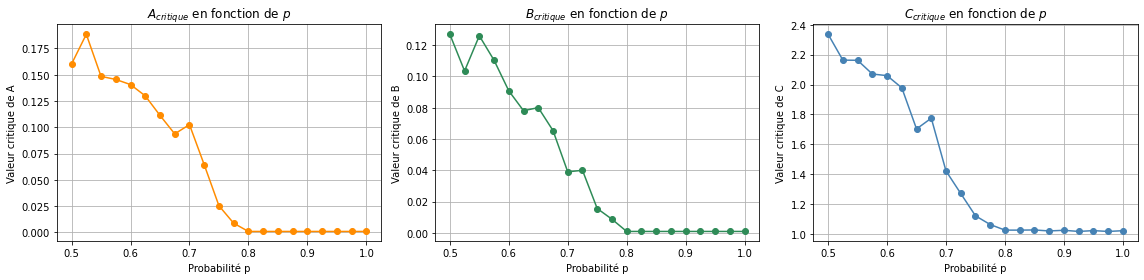

In [3]:
from tqdm import tqdm

# Paramètres 
precision = 0.001
steps = 100 
simulations = 100

# Plage de p à explorer
p_values = np.linspace(0.5, 1.0, 21)

# Calcul de A_critique en fonction de p
B_fixed = 0.01
C_fixed = 1.1
A_critiques = []
for p in tqdm(p_values, desc="Calcul A_critique"):
    A_crit = trouver_A_limite(p, B_fixed, C_fixed, steps, simulations, precision)
    A_critiques.append(A_crit)

# Calcul de B_critique en fonction de p
A_fixed = 0.01
C_fixed = 1.1
B_critiques = []
for p in tqdm(p_values, desc="Calcul B_critique"):
    B_crit = trouver_B_limite(p, A_fixed, C_fixed, steps, simulations, precision)
    B_critiques.append(B_crit)

# Calcul de C_critique en fonction de p
A_fixed = 0.01
B_fixed = 0.01
C_critiques = []
for p in tqdm(p_values, desc="Calcul C_critique"):
    C_crit = trouver_C_limite(p, A_fixed, B_fixed, steps, simulations, precision)
    C_critiques.append(C_crit)

# Graphiques
plt.figure(figsize=(16, 4))

# A critique
plt.subplot(1, 3, 1)
plt.plot(p_values, A_critiques, 'o-', color='darkorange')
plt.xlabel('Probabilité p')
plt.ylabel('Valeur critique de A')
plt.title('$A_{critique}$ en fonction de $p$')
plt.grid(True)

# B critique
plt.subplot(1, 3, 2)
plt.plot(p_values, B_critiques, 'o-', color='seagreen')
plt.xlabel('Probabilité p')
plt.ylabel('Valeur critique de B')
plt.title('$B_{critique}$ en fonction de $p$')
plt.grid(True)

# C critique
plt.subplot(1, 3, 3)
plt.plot(p_values, C_critiques, 'o-', color='steelblue')
plt.xlabel('Probabilité p')
plt.ylabel('Valeur critique de C')
plt.title('$C_{critique}$ en fonction de $p$')
plt.grid(True)

plt.tight_layout()
plt.show()

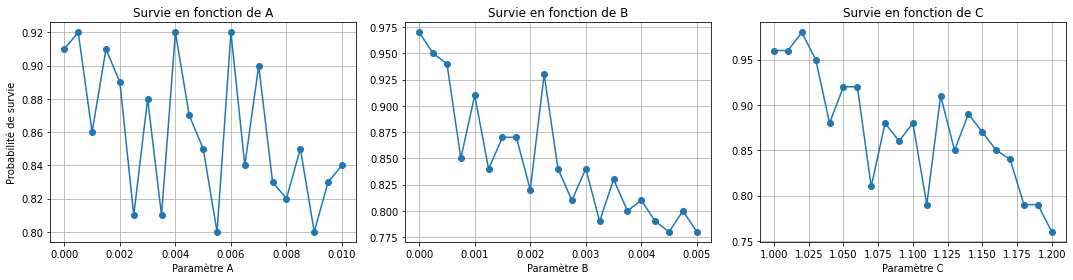

In [7]:
# Fonction de calcul du taux de survie
def taux_survie(p, A, B, C, steps, simulations):
    trajs = marche_aleatoire_makeham(p, A, B, C, steps, simulations)
    survies = sum(1 for traj in trajs if len(traj) == steps + 1 and traj[-1] > 0)
    return survies / simulations

# Paramètres fixes
p = 0.5
steps = 100  # Réduit pour que les tests soient plus rapides
simulations = 100  # Réduit pour rapidité (augmenter pour plus de précision)

# -------------------------
# Évolution du taux selon A
# -------------------------
A_vals = np.linspace(0, 0.01, 21)
B_fixed = 0.0005
C_fixed = 1.05
taux_A = [taux_survie(p, A, B_fixed, C_fixed, steps, simulations) for A in A_vals]

# -------------------------
# Évolution du taux selon B
# -------------------------
B_vals = np.linspace(0, 0.005, 21)
A_fixed = 0.001
C_fixed = 1.05
taux_B = [taux_survie(p, A_fixed, B, C_fixed, steps, simulations) for B in B_vals]

# -------------------------
# Évolution du taux selon C
# -------------------------
C_vals = np.linspace(1.0, 1.2, 21)
A_fixed = 0.001
B_fixed = 0.0005
taux_C = [taux_survie(p, A_fixed, B_fixed, C, steps, simulations) for C in C_vals]

# -------------------------
# Tracés
# -------------------------
plt.figure(figsize=(15, 4))

# Courbe pour A
plt.subplot(1, 3, 1)
plt.plot(A_vals, taux_A, 'o-', label="Taux de survie")
plt.xlabel("Paramètre A")
plt.ylabel("Probabilité de survie")
plt.title("Survie en fonction de A")
plt.grid(True)

# Courbe pour B
plt.subplot(1, 3, 2)
plt.plot(B_vals, taux_B, 'o-', label="Taux de survie")
plt.xlabel("Paramètre B")
plt.title("Survie en fonction de B")
plt.grid(True)

# Courbe pour C
plt.subplot(1, 3, 3)
plt.plot(C_vals, taux_C, 'o-', label="Taux de survie")
plt.xlabel("Paramètre C")
plt.title("Survie en fonction de C")
plt.grid(True)

plt.tight_layout()
plt.show()